In [16]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
import cv2

# Define data directory
data_dir = '/Users/shreyanadagowda/Desktop/AI model/imageclassification/acne_images'  # Replace with your actual path

# Load and preprocess images
def load_images(data_dir):
    images = []
    labels = []
    for label in os.listdir(data_dir):
        label_path = os.path.join(data_dir, label)
        if not os.path.isdir(label_path):
            continue
        for image_file in os.listdir(label_path):
            image_path = os.path.join(label_path, image_file)
            if not os.path.isfile(image_path):
                continue
            image = cv2.imread(image_path)
            if image is None:
                continue
            image = cv2.resize(image, (128, 128))  # Resize images to 128x128
            images.append(image)
            labels.append(label)
    return np.array(images), np.array(labels)

images, labels = load_images(data_dir)

# Encode labels
label_mapping = {label: idx for idx, label in enumerate(np.unique(labels))}
labels = np.array([label_mapping[label] for label in labels])
labels = to_categorical(labels)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Normalize pixel values
X_train = X_train / 255.0
X_test = X_test / 255.0

# Check the shape of the datasets
print(f'Training data shape: {X_train.shape}')
print(f'Test data shape: {X_test.shape}')
print(f'Training labels shape: {y_train.shape}')
print(f'Test labels shape: {y_test.shape}')


libpng warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
libpng warning: iCCP: profile 'icc': 0h: PCS illuminant is not D50


Training data shape: (391, 128, 128, 3)
Test data shape: (98, 128, 128, 3)
Training labels shape: (391, 4)
Test labels shape: (98, 4)


In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Build the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(label_mapping), activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))


Epoch 1/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 396ms/step - accuracy: 0.2644 - loss: 1.5630 - val_accuracy: 0.2143 - val_loss: 1.4261
Epoch 2/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 381ms/step - accuracy: 0.2577 - loss: 1.3924 - val_accuracy: 0.1837 - val_loss: 1.4176
Epoch 3/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 376ms/step - accuracy: 0.2766 - loss: 1.3834 - val_accuracy: 0.3265 - val_loss: 1.3798
Epoch 4/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 379ms/step - accuracy: 0.3271 - loss: 1.3493 - val_accuracy: 0.2755 - val_loss: 1.3624
Epoch 5/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 376ms/step - accuracy: 0.4009 - loss: 1.3389 - val_accuracy: 0.3469 - val_loss: 1.3541
Epoch 6/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 381ms/step - accuracy: 0.4403 - loss: 1.2427 - val_accuracy: 0.3571 - val_loss: 1.3662
Epoch 7/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 372ms/step - accuracy: 0.5323 - loss: 1.1083 - val_accuracy: 0.3776 - val_loss: 1.4785
Epoch 8/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 377ms/step - accuracy: 0.5080 - loss: 1.0541 - val_accuracy: 0.

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.5063 - loss: 2.7722
Test Accuracy: 48.98%


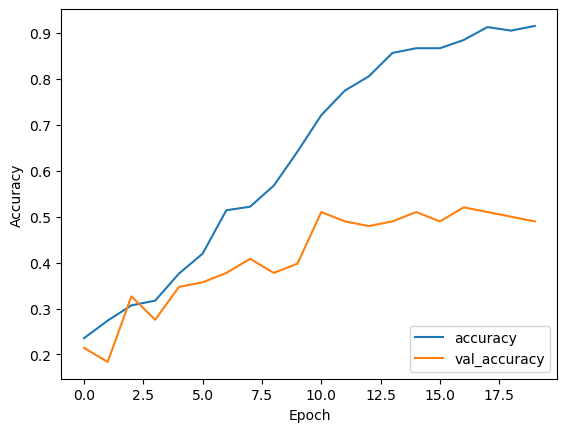

In [20]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

In [25]:
# Save the model
model.save('acne_classification_model.keras')

# Load the model
from tensorflow.keras.models import load_model
loaded_model = load_model('acne_classification_model.keras')

In [26]:
# Load and preprocess a new image
def preprocess_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.resize(image, (128, 128))
    image = image / 255.0
    image = np.expand_dims(image, axis=0)
    return image

new_image_path = '/Users/shreyanadagowda/Desktop/AI model/imageclassification/testAcne_images/test.jpeg'  # Replace with your image path
new_image = preprocess_image(new_image_path)

# Predict the class
prediction = loaded_model.predict(new_image)
predicted_class = np.argmax(prediction, axis=1)
predicted_label = list(label_mapping.keys())[list(label_mapping.values()).index(predicted_class)]

print(f'Predicted Acne Type: {predicted_label}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
Predicted Acne Type: blackheads
